In [1]:
%matplotlib inline

import bloscpack as bp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os

def get_npz_data(filename):
    filename = filename+'.npz'
    filecontents = np.load(filename)
    data = filecontents['data']
    del filecontents
    return data


def blosc_to_npz(filename):
    file = filename+".bp";

    a = bp.unpack_ndarray_file(file)
    b = np.asarray(a)

    np.savez(filename+'.npz', data=b) # Save matrix as .npz file

    print('Size of bloscpack data:')
    print(np.shape(b))
    print('')

def read_loc_into_array(filename):
    file = open(filename+'.bp', 'r')
    points = []

    for line in file:
        x, y = line.split(' ')
        x = int( x )
        y = int( y.replace('\n','') )
        points.append( [x,y] )
    return points

def change_plot_sizes( width=8, length=6):
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    # Prints: [8.0, 6.0]
    print "Current size:", fig_size

    # Set figure width to 12 and height to 9
    fig_size[0] = width
    fig_size[1] = length
    plt.rcParams["figure.figsize"] = fig_size

## Load sorted filenames

In [2]:
def get_fn_list_from_sorted_filenames( stack='MD585', as_dict=False ):
    '''
        get_fn_list_from_sorted_filenames( stack ) returns a list of all the valid
        filenames for the current stack.
    '''
    fp = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/'+'CSHL_data_processed/'+stack+'/'
    fn = stack+'_sorted_filenames.txt'
    
    file0 = open( fp+fn, 'r')
    section_names = []
    section_dict = {}

    for line in file0: 
        if 'Placeholder' in line:
            #print line
            continue
        else:
            space_index = line.index(" ")
            section_name = line[ 0 : space_index ]
            section_number = int( line[ space_index+1 : ].replace('\n','') )
            section_names.append( section_name )
            section_dict[section_name] = section_number
    if as_dict:
        return section_dict
    return section_names

section_names = get_fn_list_from_sorted_filenames()
section_dict = get_fn_list_from_sorted_filenames( stack='MD585', as_dict=True )

print(len(section_names))

439


# Generate Scoremap fn list

In [3]:
# Creates a list of the fns for every scoremap for a particular brain+structure+detector

# ZSTRZ == structure, ZFNZ == slice name, ZDETZ == detector number
fn_base = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/\
MD585_prep2_10.0um_detectorZDETZ/ZFNZ_prep2_10.0um_detectorZDETZ/\
ZFNZ_prep2_10.0um_detectorZDETZ_ZSTRZ_scoremap' # always a .bp file

ZSTRZ = '7n'
ZDETZ = '19'
valid_scoremap_fp_list = []

for section in section_names:
    ZFNZ = section
    fn = fn_base.replace('ZSTRZ',ZSTRZ).replace('ZDETZ',ZDETZ).replace('ZFNZ',ZFNZ)
    if os.path.isfile(fn+'.bp'):
        valid_scoremap_fp_list.append( fn )

## Single Example

In [4]:
scoremap_fn = valid_scoremap_fp_list[0]

# Convert .bp data into .npz format and load
blosc_to_npz( scoremap_fn )
data_scoremap = get_npz_data( scoremap_fn )

(y_len, x_len) = np.shape(data_scoremap)

Size of bloscpack data:
(498, 791)



In [12]:
data_scoremap[400,600]

0.975

In [5]:
# Load data into equivalent numpy array (or imshow gets mad)
data = np.zeros( np.shape(data_scoremap) )
for i in range(0,y_len):
    for j in range(0,x_len):
        data[i,j] = data_scoremap[i,j]

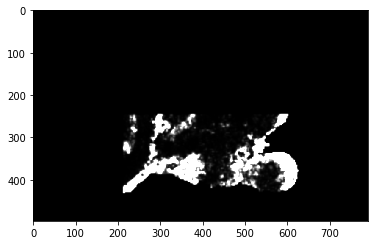

In [6]:
# Heatmap of probability values for 12N on a certain slice
plt.imshow( data, cmap='gray', vmin=0,vmax=.3 )
plt.show()

In [7]:
# FLATTEN data (and remove very low certainties for visualization)
data_bins = []
for dp in data.flatten():
#     if dp != 0.0:   # Ignore all 0% certainty
    if dp > 0.1:      # Ignore all 0-10% certainty
        data_bins.append(dp)

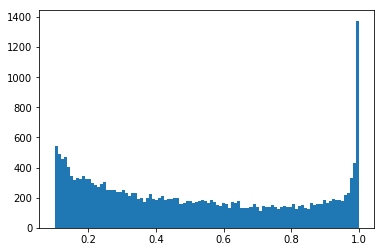

In [8]:
plt.hist(data_bins, bins=100)
plt.show()

In [112]:
def show_histogram( fn, omit_under=0.1, bins=100 ):
    scoremap_fn = fn
    print( 'section: '+fn )
    
    # Convert .bp data into .npz format and load
    if not os.path.isfile(scoremap_fn+'.bp'):
        blosc_to_npz( scoremap_fn )
    data_scoremap = get_npz_data( scoremap_fn )

    (y_len, x_len) = np.shape(data_scoremap)


    # Load data into equivalent numpy array (or imshow gets mad)
    data = np.zeros( np.shape(data_scoremap) )
    for i in range(0,y_len):
        for j in range(0,x_len):
            data[i,j] = data_scoremap[i,j]
            
    # Heatmap of probability values for 12N on a certain slice
#     plt.imshow( data, cmap='gray', vmin=0,vmax=.3 )
#     plt.show()
        
    # FLATTEN data (and remove very low certainties for visualization)
    data_bins = []
    for dp in data.flatten():
        if dp > omit_under:      # Ignore all 0-10% certainty
            data_bins.append(dp)
            
    plt.hist(data_bins, bins=bins)
    plt.show()

BAD FILE
section: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep2_10.0um_detector19/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep2_10.0um_detector19_7n_scoremap


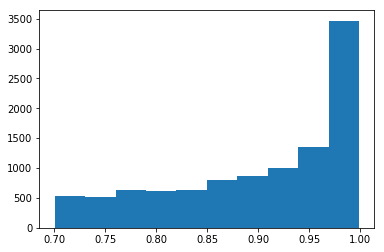

GOOD FILE
section: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep2_10.0um_detector19/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep2_10.0um_detector19_7n_scoremap


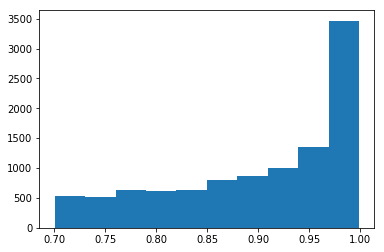

BAD FILE
section: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep2_10.0um_detector19/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep2_10.0um_detector19_7n_scoremap


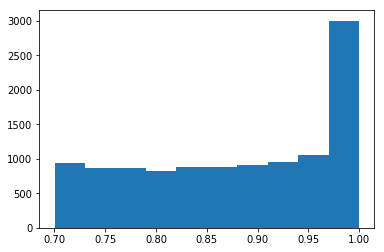

GOOD FILE
section: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep2_10.0um_detector19/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep2_10.0um_detector19_7n_scoremap


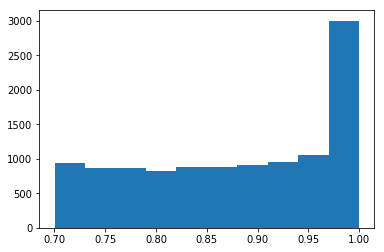

BAD FILE
section: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep2_10.0um_detector19/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep2_10.0um_detector19_7n_scoremap


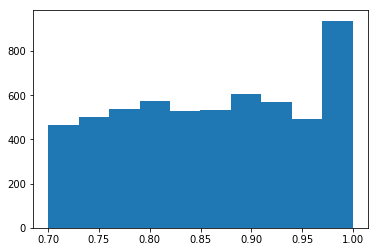

GOOD FILE
section: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep2_10.0um_detector19/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep2_10.0um_detector19_7n_scoremap


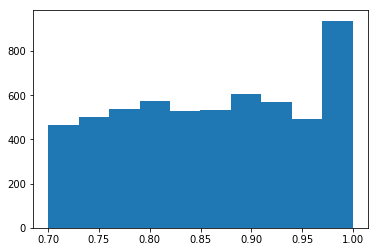

In [114]:
bad_7n_maps = ['MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168','MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060',\
               'MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087']
good_7n_maps = ['MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084','MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088']
for fn in valid_scoremap_fp_list:
    for slice_name in bad_7n_maps:
        if slice_name in fn:
            print('BAD FILE')
            show_histogram(fn, omit_under=0.7, bins=10 )
    for slice_name in bad_7n_maps:
        if slice_name in fn:
            print('GOOD FILE')
            show_histogram(fn, omit_under=0.7, bins=10 )

# Plot positives over time

In [14]:
def get_aggregate_positives( fn, omit_under=0.8 ):
    scoremap_fn = fn
    
    # Convert .bp data into .npz format and load
    if not os.path.isfile(scoremap_fn+'.bp'):
        blosc_to_npz( scoremap_fn )
    data_scoremap = get_npz_data( scoremap_fn )

    (y_len, x_len) = np.shape(data_scoremap)

    # Load data into equivalent numpy array (or imshow gets mad)
    data = np.zeros( np.shape(data_scoremap) )
    for i in range(0,y_len):
        for j in range(0,x_len):
            data[i,j] = data_scoremap[i,j]
        
    # FLATTEN data (and remove very low certainties for visualization)
    aggregate_positivity = 0
    for dp in data.flatten():
        if dp > omit_under:      # Ignore all 0-10% certainty
            aggregate_positivity = aggregate_positivity + dp
            
    return aggregate_positivity

1 highest index: 27
file: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_prep2_10.0um_detector19/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_prep2_10.0um_detector19_7n_scoremap
2 highest index: 21
file: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep2_10.0um_detector19/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep2_10.0um_detector19_7n_scoremap
3 highest index: 16
file: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep2_10.0um_detector19/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep2_10.0um_detector19_7n_scoremap
4 highest index: 96
file: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC36-2015.08.19-13.58.57_MD585_2_01

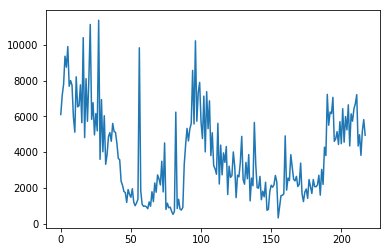

In [18]:
positive_values = []

for fn in valid_scoremap_fp_list:
    positive_values.append( get_aggregate_positives(fn,omit_under=0.7) )
    
dummy_positive_values = positive_values[:]
for i in range(1,10):
    highest_index = np.argmax(dummy_positive_values)
    dummy_positive_values[highest_index] = 0
    print( str(i)+' highest index: '+str(highest_index) )
    print( 'file: '+valid_scoremap_fp_list[ highest_index ] )

plt.plot(positive_values)

1 highest index: 5
file: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep2_10.0um_detector19/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep2_10.0um_detector19_7n_scoremap
2 highest index: 7
file: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep2_10.0um_detector19/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep2_10.0um_detector19_7n_scoremap
3 highest index: 4
file: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_prep2_10.0um_detector19/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_prep2_10.0um_detector19_7n_scoremap
4 highest index: 56
file: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_scoremaps/10.0um/MD585/MD585_prep2_10.0um_detector19/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0

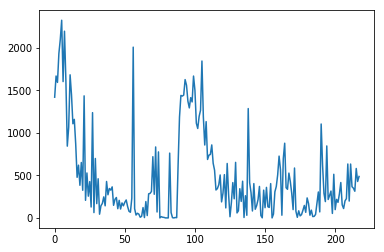

In [20]:
positive_values = []

for fn in valid_scoremap_fp_list:
    positive_values.append( get_aggregate_positives(fn,omit_under=0.99) )
    
dummy_positive_values = positive_values[:]
for i in range(1,10):
    highest_index = np.argmax(dummy_positive_values)
    dummy_positive_values[highest_index] = 0
    print( str(i)+' highest index: '+str(highest_index) )
    print( 'file: '+valid_scoremap_fp_list[ highest_index ] )

plt.plot(positive_values)